In [2]:
import pandas as pd

# De/Para UFs - Regiões

In [5]:
# De_para UF/Regiao
uf_regiao = {
    'Acre': 'Norte',
    'Alagoas': 'Nordeste',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Goiás': 'Centro-Oeste',
    'Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Pará': 'Norte',
    'Paraíba': 'Nordeste',
    'Paraná': 'Sul',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste',
    'Rio Grande do Norte': 'Nordeste',
    'Rio Grande do Sul': 'Sul',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Santa Catarina': 'Sul',
    'São Paulo': 'Sudeste',
    'Sergipe': 'Nordeste',
    'Tocantins': 'Norte',
    'Brasil' : 'Brasil'
}


# Média de horas em afazeres domésticos por ocupação e sexo


In [6]:
hr_cuidados_ocup = pd.read_excel("/content/Dados_PNAD_2022.xlsx", sheet_name= "7013", skiprows= 1)

hr_cuidados_ocup["Regiao"] = hr_cuidados_ocup["UF"].map(uf_regiao)

df = hr_cuidados_ocup.groupby(["Regiao", "Sexo", "Ocupação"]).mean("Med_Horas").reset_index()


In [7]:
ocup = df.query("Regiao == 'Brasil' & Ocupação != 'Total' & Sexo != 'Total' & Ocupação == 'Ocupadas'")
desoc = df.query("Regiao == 'Brasil' & Ocupação != 'Total' & Sexo != 'Total' & Ocupação == 'Não ocupadas'")

In [8]:
import matplotlib.pyplot as plt

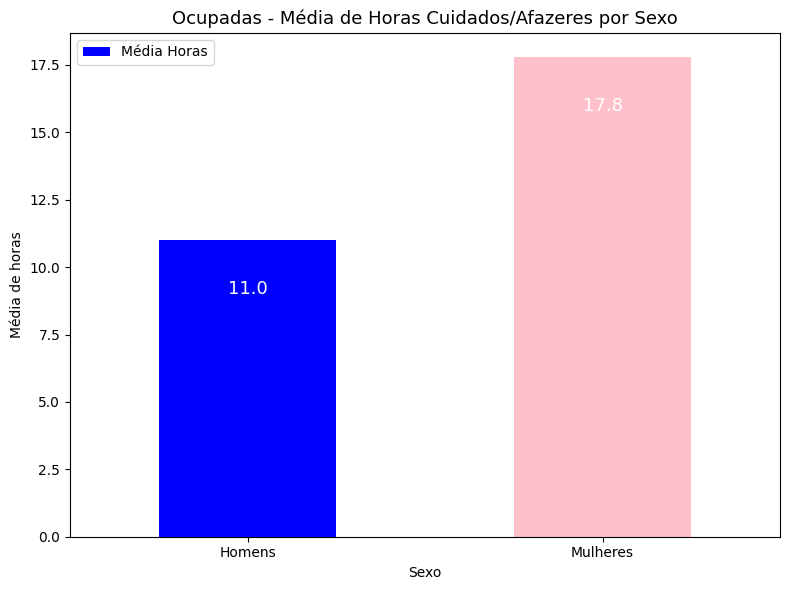

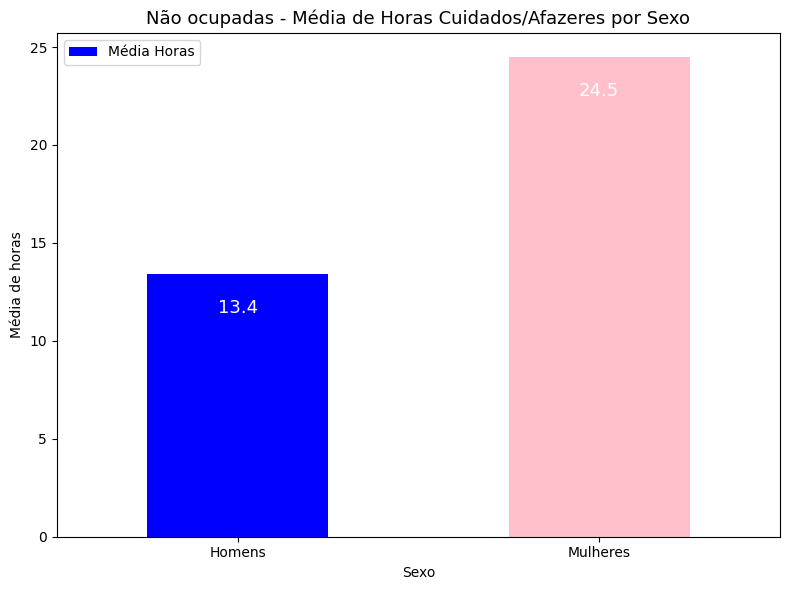

In [9]:
for status in [ocup, desoc]:
  fig, ax = plt.subplots(figsize=(8, 6))
  df_plot = pd.DataFrame({
      'Sexo': ['Homens', 'Mulheres'],
      'Média Horas': [status.query("Sexo == 'Homens'")["Med_Horas"].values[0], status.query("Sexo == 'Mulheres'")["Med_Horas"].values[0]]
  })
  bars = df_plot.plot(kind='bar', x='Sexo', y='Média Horas', ax=ax, color=['blue', 'pink'])

  plt.xlabel('Sexo')
  plt.ylabel('Média de horas')
  plt.title(f'{status["Ocupação"].values[0]} - Média de Horas Cuidados/Afazeres por Sexo', fontsize=13)


  for bar in bars.patches:
      yval = bar.get_height()
      ax.text(bar.get_x() + bar.get_width() / 2, yval - 2, round(yval, 2), ha='center', color='white', fontsize=13)

  plt.xticks(rotation=360)

  plt.tight_layout()
  plt.show()


## [Gráfico 1](https://public.flourish.studio/visualisation/15914632/)

In [8]:
pivot = df.pivot_table(values = "Med_Horas", index = ["Ocupação", "Regiao"], columns = "Sexo", aggfunc= "sum").query("Ocupação != 'Total'").reset_index()
pivot

Sexo,Ocupação,Regiao,Homens,Mulheres,Total
0,Não ocupadas,Brasil,13.400000,24.500000,20.900000
1,Não ocupadas,Centro-Oeste,11.875000,21.850000,18.775000
2,Não ocupadas,Nordeste,13.155556,26.011111,21.988889
3,Não ocupadas,Norte,12.585714,20.685714,18.100000
4,Não ocupadas,Sudeste,13.675000,24.750000,21.100000
5,Não ocupadas,Sul,13.533333,22.566667,19.466667
6,Ocupadas,Brasil,11.000000,17.800000,14.100000
7,Ocupadas,Centro-Oeste,9.925000,16.125000,12.700000
8,Ocupadas,Nordeste,11.122222,20.011111,15.100000
9,Ocupadas,Norte,10.771429,16.371429,13.100000


## [Gráfico 2](https://public.flourish.studio/visualisation/15914733/)

In [ ]:
df1 = df[["Sexo", "Ocupação", "Med_Horas", "Regiao"]].query("Sexo != 'Total'").reset_index()

df1

,index,Sexo,Ocupação,Med_Horas,Regiao
0,0,Homens,Não ocupadas,13.400000,Brasil
1,1,Homens,Ocupadas,11.000000,Brasil
2,2,Homens,Total,11.700000,Brasil
3,3,Mulheres,Não ocupadas,24.500000,Brasil
4,4,Mulheres,Ocupadas,17.800000,Brasil
5,5,Mulheres,Total,21.300000,Brasil
6,9,Homens,Não ocupadas,11.875000,Centro-Oeste
7,10,Homens,Ocupadas,9.925000,Centro-Oeste
8,11,Homens,Total,10.375000,Centro-Oeste
9,12,Mulheres,Não ocupadas,21.850000,Centro-Oeste


# Pirâmide Etária (Grupo de idades PNAD)


[Gráfico](https://public.flourish.studio/visualisation/15915070/)

In [3]:
censo_pnad = pd.read_excel("/content/Dados_PNAD_2022.xlsx", sheet_name= "Censo_PNAD", skiprows= 1)

In [4]:
censo_pnad["Regiao"] = censo_pnad["UF"].map(uf_regiao)

In [5]:
df = censo_pnad.groupby(["Regiao", "Sexo", "Faixa_PNAD"]).sum("Pessoas").reset_index().query("Faixa_PNAD != 'Total'and Sexo != 'Total'")
df.head()

,Regiao,Sexo,Faixa_PNAD,Ano,Pessoas
0,Brasil,Homens,13 anos ou menos,26286,17865903
1,Brasil,Homens,14 a 17 anos,8088,5788694
2,Brasil,Homens,18 a 24 anos,14154,10698673
3,Brasil,Homens,25 a 39 anos,30330,22992076
4,Brasil,Homens,40 a 59 anos,40440,25764064


In [6]:
pivot = df.pivot_table(values = "Pessoas", index = ["Regiao", "Faixa_PNAD"], columns = "Sexo", aggfunc="sum").reset_index()
pivot["Homens"] = pivot["Homens"]*-1
pivot

Sexo,Regiao,Faixa_PNAD,Homens,Mulheres
0,Brasil,13 anos ou menos,-17865903,17168957
1,Brasil,14 a 17 anos,-5788694,5552739
2,Brasil,18 a 24 anos,-10698673,10538435
3,Brasil,25 a 39 anos,-22992076,24123555
4,Brasil,40 a 59 anos,-25764064,28115905
5,Brasil,60 anos ou mais,-14225753,17887737
6,Centro-Oeste,13 anos ou menos,-1512893,1457468
7,Centro-Oeste,14 a 17 anos,-472742,455772
8,Centro-Oeste,18 a 24 anos,-888179,871063
9,Centro-Oeste,25 a 39 anos,-1944322,2003034


# Proporção Homens/Mulheres (Pizza)

### [Gráfico](https://public.flourish.studio/visualisation/15914597/)

In [ ]:
censo = pd.read_excel("/content/Dados_PNAD_2022.xlsx", sheet_name= "Censo", skiprows= 1)
censo["Regiao"] = censo["UF"].map(uf_regiao)

In [ ]:
taxas_pop = []

for sexo in ["Mulheres", "Homens"]:
  for regiao in censo["Regiao"].unique():
    df_m = censo.query(f"Regiao == '{regiao}' and Sexo == '{sexo}'")
    df_t = censo.query(f"Regiao == '{regiao}' and Sexo == 'Total'")
    taxa = df_m["Pessoas"].values[0]/df_t["Pessoas"].values[0] * 100
    taxas_pop.append({'regiao' : regiao, 'sexo' : sexo, 'taxa' : taxa})

In [ ]:
df = pd.DataFrame(taxas_pop)
df

,regiao,sexo,taxa
0,Brasil,Mulheres,51.481158
1,Norte,Mulheres,50.165128
2,Nordeste,Mulheres,50.869867
3,Sudeste,Mulheres,51.238002
4,Sul,Mulheres,51.265599
5,Centro-Oeste,Mulheres,50.797657
6,Brasil,Homens,48.518842
7,Norte,Homens,49.834872
8,Nordeste,Homens,49.130133
9,Sudeste,Homens,48.761998


# Instrução

In [ ]:
educ = pd.read_excel("/content/Dados_PNAD_2022.xlsx", sheet_name= "7128", skiprows= 1)
educ["Regiao"] = educ["UF"].map(uf_regiao)

In [ ]:
taxas_educ = []

for sexo in ["Mulheres", "Homens"]:
  for regiao in educ["Regiao"].unique():
    for instrucao in educ["Instrução"].unique():
      df_m = educ.query(f"Regiao == '{regiao}' and Instrução == '{instrucao}' and Sexo == '{sexo}'")
      df_t = educ.query(f"Regiao == '{regiao}' and Instrução == 'Total' and Sexo == '{sexo}'")
      taxa = df_m["Pessoas"].values[0]/df_t["Pessoas"].values[0] * 100
      taxas_educ.append({'regiao' : regiao, 'instrução': instrucao, 'sexo' : sexo, 'taxa' : taxa})

taxas_educ = pd.DataFrame(taxas_educ)
df = taxas_educ.query("instrução != 'Total'")

In [ ]:
inst = {'Total' : 'Total',
        'Sem instrução' : 'Sem instrução',
       'Ensino fundamental incompleto ou equivalente' : 'Ensino fundamental incompleto',
       'Ensino fundamental completo ou equivalente' : 'Ensino fundamental completo',
       'Ensino médio incompleto ou equivalente' : 'Ensino médio incompleto',
       'Ensino médio completo ou equivalente' : 'Ensino médio completo',
       'Ensino superior incompleto ou equivalente' : 'Ensino superior incompleto',
       'Superior completo' : 'Superior completo'}

df["Inst"] = df["instrução"].map(inst)

In [ ]:
df = df[["Inst", "regiao", "sexo", "taxa"]]

### [Gráfico 1](https://public.flourish.studio/visualisation/15926527/)

In [ ]:
pivot = df.pivot_table(values = "taxa", index = ["sexo", "regiao"], columns = "Inst", aggfunc="sum").reset_index()
pivot

Inst,sexo,regiao,Ensino fundamental completo,Ensino fundamental incompleto,Ensino médio completo,Ensino médio incompleto,Ensino superior incompleto,Sem instrução,Superior completo
0,Homens,Brasil,9.131552,27.707848,30.405833,8.838683,5.156894,4.940530,13.818660
1,Homens,Centro-Oeste,8.790170,30.718336,26.937618,9.073724,5.765595,4.158790,14.555766
2,Homens,Nordeste,9.791271,31.954459,27.855787,9.905123,3.036053,10.626186,6.869070
3,Homens,Norte,9.193777,33.097595,27.722772,10.183876,3.960396,5.940594,9.759547
4,Homens,Sudeste,9.582281,33.601102,27.323847,9.547854,4.624742,2.868947,12.462704
5,Homens,Sul,10.855905,27.908992,29.230769,8.754063,5.070423,3.401950,14.799567
6,Mulheres,Brasil,8.326623,24.739409,30.708406,7.841229,5.393012,4.932224,18.059097
7,Mulheres,Centro-Oeste,8.325873,24.888093,27.573859,8.594449,6.177261,3.849597,20.590868
8,Mulheres,Nordeste,8.943089,26.440438,31.495228,8.907741,3.994344,9.190527,11.028632
9,Mulheres,Norte,7.816712,27.088949,28.167116,8.625337,5.121294,6.199461,16.846361


### [Gráfico 2](https://public.flourish.studio/visualisation/15926911/)

In [ ]:
df.pivot_table(values = "taxa", index = ["Inst", "regiao"], columns = "sexo", aggfunc="sum").reset_index()

sexo,Inst,regiao,Homens,Mulheres
0,Ensino fundamental completo,Brasil,9.131552,8.326623
1,Ensino fundamental completo,Centro-Oeste,8.790170,8.325873
2,Ensino fundamental completo,Nordeste,9.791271,8.943089
3,Ensino fundamental completo,Norte,9.193777,7.816712
4,Ensino fundamental completo,Sudeste,9.582281,7.838935
5,Ensino fundamental completo,Sul,10.855905,8.886108
6,Ensino fundamental incompleto,Brasil,27.707848,24.739409
7,Ensino fundamental incompleto,Centro-Oeste,30.718336,24.888093
8,Ensino fundamental incompleto,Nordeste,31.954459,26.440438
9,Ensino fundamental incompleto,Norte,33.097595,27.088949


# Rendimento

In [ ]:
renda = pd.read_excel("/content/Dados_PNAD_2022.xlsx", sheet_name= "7444", skiprows= 1)
renda["Regiao"] = renda["UF"].map(uf_regiao)

### [Gráfico 1](https://public.flourish.studio/visualisation/15956211/)

In [ ]:
df = renda.groupby(["Regiao", "Sexo"]).mean("Reais").reset_index().query("Sexo != 'Total'")
df[["Regiao", "Sexo", "Reais"]]

,Regiao,Sexo,Reais
0,Brasil,Homens,2920.000000
1,Brasil,Mulheres,2303.000000
3,Centro-Oeste,Homens,3622.500000
4,Centro-Oeste,Mulheres,2618.250000
6,Nordeste,Homens,2012.111111
7,Nordeste,Mulheres,1705.666667
9,Norte,Homens,2358.428571
10,Norte,Mulheres,2090.571429
12,Sudeste,Homens,3203.750000
13,Sudeste,Mulheres,2407.250000


### [Gráfico 2](https://public.flourish.studio/visualisation/15956465/)

In [ ]:
pivot = df.pivot_table(values = "Reais", index = "Regiao", columns = "Sexo", aggfunc="sum")
pivot

Sexo,Homens,Mulheres
Regiao,,
Brasil,2920.000000,2303.000000
Centro-Oeste,3622.500000,2618.250000
Nordeste,2012.111111,1705.666667
Norte,2358.428571,2090.571429
Sudeste,3203.750000,2407.250000
Sul,3335.000000,2487.333333


# Horas trabalhadas

In [ ]:
hr_trab = pd.read_excel("/content/Dados_PNAD_2022.xlsx", sheet_name= "6371", skiprows= 1)
hr_trab["Regiao"] = hr_trab["UF"].map(uf_regiao)

### [Gráfico 1](https://public.flourish.studio/visualisation/15956688/)

In [ ]:
df = hr_trab.groupby(["Regiao", "Sexo"]).mean("Med_Horas").reset_index().query("Sexo != 'Total'")
df

,Regiao,Sexo,Med_Horas
0,Brasil,Homens,41.700000
1,Brasil,Mulheres,37.500000
3,Centro-Oeste,Homens,43.025000
4,Centro-Oeste,Mulheres,38.000000
6,Nordeste,Homens,39.222222
7,Nordeste,Mulheres,35.511111
9,Norte,Homens,39.785714
10,Norte,Mulheres,36.600000
12,Sudeste,Homens,42.450000
13,Sudeste,Mulheres,37.850000


### [Gráfico 2](https://public.flourish.studio/visualisation/15956830/)

In [ ]:
pivot = df.pivot_table(values = "Med_Horas", index = "Regiao", columns = "Sexo", aggfunc="sum").reset_index()
pivot

Sexo,Regiao,Homens,Mulheres
0,Brasil,41.700000,37.500000
1,Centro-Oeste,43.025000,38.000000
2,Nordeste,39.222222,35.511111
3,Norte,39.785714,36.600000
4,Sudeste,42.450000,37.850000
5,Sul,42.800000,38.766667
